In [1]:
import numpy as np
from astropy.table import Table, join
import matplotlib.pyplot as plt

## Our x-axis will be the 7" CO intensity from the smoothed mask.  Our y-axis will be the Halpha flux from flux_elines smoothed to 7".

In [2]:
hafile = '../img_califa/NGC4047.pipe3d.hdf5'
cofile = '../img_comom/NGC4047.comom_smo7.hdf5'

In [3]:
cotab=Table.read(cofile, path='smo')
print(cotab)

  Name   ix  iy    ra_off      dec_off    emom0max   mom0    emom0  
                    deg          deg      K km / s K km / s K km / s
------- --- --- ------------ ------------ -------- -------- --------
NGC4047   2   2  0.032772586  -0.02167132      nan      nan      nan
NGC4047   2   5   0.03277313 -0.020837985      nan      nan      nan
NGC4047   2   8   0.03277367 -0.020004652      nan      nan      nan
NGC4047   2  11   0.03277421 -0.019171318      nan      nan      nan
NGC4047   2  14   0.03277475 -0.018337986      nan      nan      nan
NGC4047   2  17   0.03277529 -0.017504651      nan      nan      nan
NGC4047   2  20  0.032775834 -0.016671319      nan      nan      nan
NGC4047   2  23  0.032776374 -0.015837986      nan      nan      nan
NGC4047   2  26  0.032776915 -0.015004652      nan      nan      nan
NGC4047   2  29  0.032777455 -0.014171319      nan      nan      nan
    ... ... ...          ...          ...      ...      ...      ...
NGC4047 158 131  -0.03279587  0.01

In [4]:
hatab=Table.read(hafile, path='flux_elines_sm')
print(hatab)

  Name   ix  iy    ra_off    ... e_EW_[NII]6548 e_EW_[SII]6717 e_EW_[SII]6731
                    deg      ...    Angstrom       Angstrom       Angstrom   
------- --- --- ------------ ... -------------- -------------- --------------
NGC4047   2   2  0.032772586 ...            nan            nan            nan
NGC4047   2   5   0.03277313 ...            nan            nan            nan
NGC4047   2   8   0.03277367 ...            nan            nan            nan
NGC4047   2  11   0.03277421 ...            nan            nan            nan
NGC4047   2  14   0.03277475 ...            nan            nan            nan
NGC4047   2  17   0.03277529 ...            nan            nan            nan
NGC4047   2  20  0.032775834 ...            nan            nan            nan
NGC4047   2  23  0.032776374 ...            nan            nan            nan
NGC4047   2  26  0.032776915 ...            nan            nan            nan
NGC4047   2  29  0.032777455 ...            nan            nan  

In [5]:
jointbl = join(cotab,hatab)

In [6]:
print(jointbl.colnames)

['Name', 'ix', 'iy', 'ra_off', 'dec_off', 'emom0max', 'mom0', 'emom0', 'flux_[OII]3727', 'flux_[OIII]5007', 'flux_[OIII]4959', 'flux_Hbeta', 'flux_Halpha', 'flux_[NII]6583', 'flux_[NII]6548', 'flux_[SII]6717', 'flux_[SII]6731', 'vel_[OII]3727', 'vel_[OIII]5007', 'vel_[OIII]4959', 'vel_Hbeta', 'vel_Halpha', 'vel_[NII]6583', 'vel_[NII]6548', 'vel_[SII]6717', 'vel_[SII]6731', 'disp_[OII]3727', 'disp_[OIII]5007', 'disp_[OIII]4959', 'disp_Hbeta', 'disp_Halpha', 'disp_[NII]6583', 'disp_[NII]6548', 'disp_[SII]6717', 'disp_[SII]6731', 'EW_[OII]3727', 'EW_[OIII]5007', 'EW_[OIII]4959', 'EW_Hbeta', 'EW_Halpha', 'EW_[NII]6583', 'EW_[NII]6548', 'EW_[SII]6717', 'EW_[SII]6731', 'e_flux_[OII]3727', 'e_flux_[OIII]5007', 'e_flux_[OIII]4959', 'e_flux_Hbeta', 'e_flux_Halpha', 'e_flux_[NII]6583', 'e_flux_[NII]6548', 'e_flux_[SII]6717', 'e_flux_[SII]6731', 'e_vel_[OII]3727', 'e_vel_[OIII]5007', 'e_vel_[OIII]4959', 'e_vel_Hbeta', 'e_vel_Halpha', 'e_vel_[NII]6583', 'e_vel_[NII]6548', 'e_vel_[SII]6717', 'e_vel

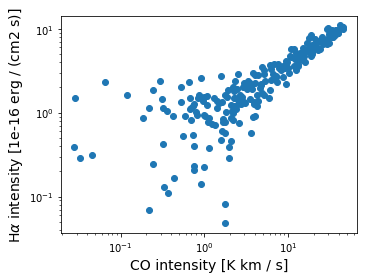

In [8]:
plt.loglog(jointbl['mom0'],jointbl['flux_Halpha'],ls='None',marker='o')
plt.xlabel('CO intensity ['+str(jointbl['mom0'].unit)+']',fontsize=14)
plt.ylabel(r'H$\alpha$ intensity ['+str(jointbl['flux_Halpha'].unit)+']',fontsize=14)
plt.gca().set_aspect('equal')